The goals of this project are:
- to explore the Brazilian E-Commerce Public Dataset by Olist
- conduct the basic statistical analysis and hypothesis testing to get the insights from the data

# Set up

## Import

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
url_data_sellers = 'https://drive.google.com/uc?id=1l8D7IXm_PNanHxZd5o-TMXUfFjMjmjTt'
url_data_products = 'https://drive.google.com/uc?id=1nQbxCtBbBT62pZvVaQer4zls13Da75_y'
url_data_orders_status = 'https://drive.google.com/uc?id=1GMU0DZJqMCWmNVTsvpyC4z9pkyDK4G2Y'
url_data_reviews = 'https://drive.google.com/uc?id=1_xpF2H_aTXaPRnuh7EwjSZHZd56Pf0pU'
url_data_payments = 'https://drive.google.com/uc?id=1PyI6ltW5YXMtdD_rGG47S0DzxQ66B-IC'
url_data_orders_items = 'https://drive.google.com/uc?id=1R6ekFeO6fIcCYCyKCbs6sU0_h9yoQwlX'
url_data_customers = 'https://drive.google.com/uc?id=1ljrSWim_59WVkS43HVWHSrMO66zAgpAB'

In [3]:
#Dimension tables
df_sellers = pd.read_csv(url_data_sellers)
df_products = pd.read_csv(url_data_products)
df_customers = pd.read_csv(url_data_customers)

#Metrics table
df_orders_status = pd.read_csv(url_data_orders_status)
df_orders_items = pd.read_csv(url_data_orders_items)
df_payments = pd.read_csv(url_data_payments)
df_reviews = pd.read_csv(url_data_reviews)

## Data Preparation


Check the shapes of all tables

In [4]:
print(f'df_sellers {df_sellers.shape}')
print(f'df_products {df_products.shape}')
print(f'df_customers {df_customers.shape}')
print(f'df_orders_status {df_orders_status.shape}')
print(f'df_orders_items {df_orders_items.shape}')
print(f'df_payments {df_payments.shape}')
print(f'df_reviews {df_reviews.shape}')

df_sellers (3095, 4)
df_products (32951, 9)
df_customers (99441, 5)
df_orders_status (99441, 8)
df_orders_items (112650, 7)
df_payments (103886, 5)
df_reviews (99224, 7)


Analyze each table to gain insights and clean the data.

### df_sellers

In [5]:
# Check the data structure
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [6]:
# Test the primary key
df_sellers["seller_id"].nunique() == len(df_sellers)

True

In [7]:
# Display the number of unique sellers
print(f'Number of unique sellers: {df_sellers["seller_id"].nunique()}')

Number of unique sellers: 3095


In [8]:
# Check which state has the highest nb of sellers
df_sellers.groupby('seller_state')['seller_id'].nunique().sort_values(ascending = False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [9]:
# Keep only relevant columns
df_sellers = df_sellers[["seller_id","seller_state"]]

### df_products

In [10]:
# check the percentage of missing values
df_products.isnull().sum()/len(df_products)*100

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [11]:
df_products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [12]:
# Keep only relevant columns
df_products = df_products[["product_id","product_category_name"]]

In [13]:
# Test primary key
df_products["product_id"].nunique() == len(df_products)

True

In [14]:
# Top 10 products
df_products["product_category_name"].value_counts().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64

In [15]:
# Replace null values in 'category' with 'other'
df_products["product_category_name"] = df_products["product_category_name"].fillna("other")

In [16]:
# Check the data structure after the cleaning
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [17]:
# What are the product category
df_products["product_category_name"].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio',
       'other', 'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',

### df_customers

In [18]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [19]:
customers_features = ['customer_id', 'customer_unique_id',
       'customer_city', 'customer_state']

In [20]:
# Check the data structure
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [21]:
# Keep only relevant columns
df_customers = df_customers[["customer_id","customer_state"]]

In [22]:
# Primary key test
df_customers["customer_id"].nunique() == len(df_customers)

True

In [23]:
# Check the data structure after the cleaning
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_state  99441 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [24]:
# What are unique customer_state
df_customers["customer_state"].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

### df_orders_status

In [25]:
# Check the columns, data types and nulls
df_orders_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
# Convert datetimes
df_orders_status["order_purchase_timestamp"] = pd.to_datetime(df_orders_status["order_purchase_timestamp"])
df_orders_status["order_approved_at"] = pd.to_datetime(df_orders_status["order_approved_at"])
df_orders_status["order_delivered_carrier_date"] = pd.to_datetime(df_orders_status["order_delivered_carrier_date"])
df_orders_status["order_delivered_customer_date"] = pd.to_datetime(df_orders_status["order_delivered_customer_date"])
df_orders_status["order_estimated_delivery_date"] = pd.to_datetime(df_orders_status["order_estimated_delivery_date"])

In [27]:
# Calculate orders delivery time
df_orders_status["delivery_time_days"] = (df_orders_status["order_delivered_customer_date"] - df_orders_status["order_purchase_timestamp"]).dt.days

In [28]:
# Create a new column "delayed" (yes/no)
df_orders_status["is_delayed"] = np.where(df_orders_status['order_delivered_customer_date'] > df_orders_status['order_estimated_delivery_date'],1,0)

In [29]:
# Calculate nb of orders_delayed
df_orders_status["delayed_nb_days"] = np.where(df_orders_status["is_delayed"] == 1,
     (df_orders_status['order_delivered_customer_date'] - df_orders_status['order_estimated_delivery_date']).dt.days,
    0)

In [30]:
# Check nulls (percentage of total)
df_orders_status.isnull().sum() / len(df_orders_status)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
delivery_time_days               0.029817
is_delayed                       0.000000
delayed_nb_days                  0.000000
dtype: float64

In [31]:
# check nulls for delivered orders
df_orders_status[df_orders_status["order_status"] == "delivered"].isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
delivery_time_days                8
is_delayed                        0
delayed_nb_days                   0
dtype: int64

In [32]:
# Fill nulls with 0
df_orders_status = df_orders_status.fillna(0)

In [33]:
# Keep only relevant columns
df_orders_status = df_orders_status[["order_id","customer_id","order_status","order_purchase_timestamp","delivery_time_days","is_delayed","delayed_nb_days"]]

In [34]:
# What are the order statuses
df_orders_status["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [35]:
# Check the data structure after the cleaning
df_orders_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
 4   delivery_time_days        99441 non-null  float64       
 5   is_delayed                99441 non-null  int32         
 6   delayed_nb_days           99441 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 4.9+ MB


In [36]:
# PK test
df_orders_status["order_id"].nunique() == len(df_orders_status)

True

In [37]:
# percentage of delayed orders
df_orders_status["is_delayed"].value_counts(normalize = True)

is_delayed
0    0.92129
1    0.07871
Name: proportion, dtype: float64

In [38]:
# check number of delayed orders
df_orders_status["delayed_nb_days"].value_counts()

delayed_nb_days
0.0      92906
1.0        825
2.0        545
3.0        500
7.0        483
         ...  
91.0         1
123.0        1
83.0         1
67.0         1
110.0        1
Name: count, Length: 116, dtype: int64

### df_orders_items

In [39]:
df_orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [40]:
# calculate total_turnover
df_orders_items["total_turnover"] = df_orders_items["price"] + df_orders_items["freight_value"]

In [41]:
# keep only relevant columns
df_orders_items=df_orders_items[["order_id","product_id","seller_id","price","freight_value","total_turnover"]]

### df_payments

In [42]:
# check the data structure
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [43]:
# keep only relevant columns
df_payments = df_payments[["order_id","payment_type","payment_value"]]

In [44]:
# check the data structure after the cleaning
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       103886 non-null  object 
 1   payment_type   103886 non-null  object 
 2   payment_value  103886 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [45]:
# pk test
df_payments["order_id"].nunique() == len(df_payments) #one order can be assosiated with the several payment types

False

In [46]:
# check payment type distribution
df_payments["payment_type"].value_counts(normalize=True)

payment_type
credit_card    0.739224
boleto         0.190440
voucher        0.055590
debit_card     0.014718
not_defined    0.000029
Name: proportion, dtype: float64

In [47]:
# average payment value
(df_payments.groupby("order_id")["payment_value"].sum()).mean()

160.9902666934835

### df_reviews

In [48]:
# Check the data structure
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [49]:
# Drop columns with nulls values (not relevant for the analysis)
df_reviews = df_reviews.dropna(axis='columns')

In [50]:
# Convert datetime
df_reviews["review_creation_date"] = pd.to_datetime(df_reviews["review_creation_date"])
df_reviews["review_answer_timestamp"] = pd.to_datetime(df_reviews["review_answer_timestamp"])

In [51]:
# Pk test
df_reviews["review_id"].nunique() == len(df_reviews)

False

In [52]:
# Review score distribution
df_reviews["review_score"].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

In [53]:
# Create custom column
df_reviews["is_satisfied"] = np.where(df_reviews["review_score"] >= 4,1,0)

In [54]:
# Check the data structure after the cleaning
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
 5   is_satisfied             99224 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 4.2+ MB


# Descriptive Statistics

## Order Price

In [55]:
df_orders_items[["price"]].describe()

,price
count,112650.000000
mean,120.653739
std,183.633928
min,0.850000
25%,39.900000
50%,74.990000
75%,134.900000
max,6735.000000


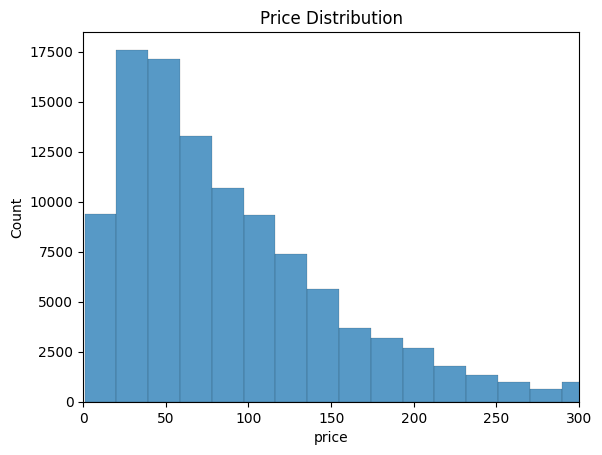

In [56]:
# Plot the price distribution
sns.histplot(data=df_orders_items, x="price",bins=350)
plt.title("Price Distribution")
plt.xlim(0, 300)
plt.show()

In [57]:
print(f'The most common price is {df_orders_items["price"].mode()[0]}')

The most common price is 59.9


## Reviews

In [58]:
print(f'Mean of review_score: {df_reviews["review_score"].mean()}')

Mean of review_score: 4.08642062404257


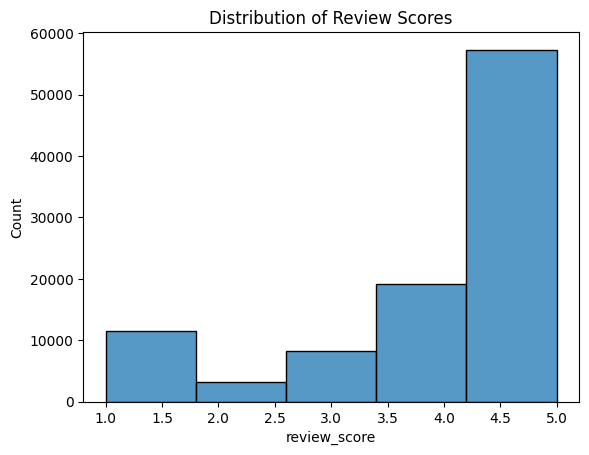

In [59]:
# check the distribution of the reviews scores
sns.histplot(data=df_reviews, x="review_score",bins=5)
plt.title("Distribution of Review Scores")
plt.show()

In [60]:
print(f'Proportion: {df_reviews["is_satisfied"].value_counts(normalize=True)}')

Proportion: is_satisfied
1    0.77068
0    0.22932
Name: proportion, dtype: float64


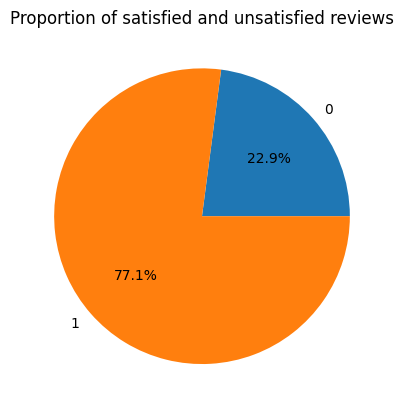

In [61]:
# plot the proportion of unsatisfied reviews
df_aggr_satisfied = df_reviews.groupby("is_satisfied",as_index=False) ["review_id"].count()

fig, ax = plt.subplots()
ax.pie(df_aggr_satisfied["review_id"], labels=df_aggr_satisfied["is_satisfied"], autopct='%1.1f%%')
ax.set_title("Proportion of satisfied and unsatisfied reviews")
plt.show()

> 22.9% of orders have unsatisfied reviews

## Delivery Time


In [62]:
#Filter orders with "delivered" status
df_orders_delivered = df_orders_status[df_orders_status["order_status"] == "delivered"]

In [63]:
df_orders_delivered.describe()

,order_purchase_timestamp,delivery_time_days,is_delayed,delayed_nb_days
count,96478,96478.000000,96478.000000,96478.000000
mean,2018-01-01 23:29:31.939913984,12.092601,0.081117,0.719252
min,2016-09-15 12:16:38,0.000000,0.000000,0.000000
25%,2017-09-14 09:00:23.249999872,6.000000,0.000000,0.000000
50%,2018-01-20 19:45:45,10.000000,0.000000,0.000000
75%,2018-05-05 18:54:47,15.000000,0.000000,0.000000
max,2018-08-29 15:00:37,209.000000,1.000000,188.000000
std,NaN,9.551619,0.273016,4.652375


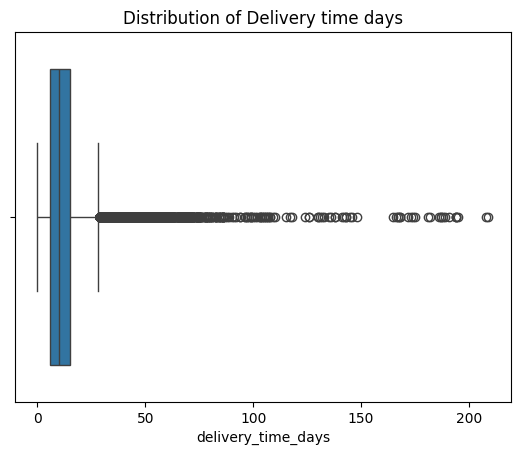

In [64]:
sns.boxplot(x=df_orders_delivered["delivery_time_days"])
plt.title("Distribution of Delivery time days")
plt.show()

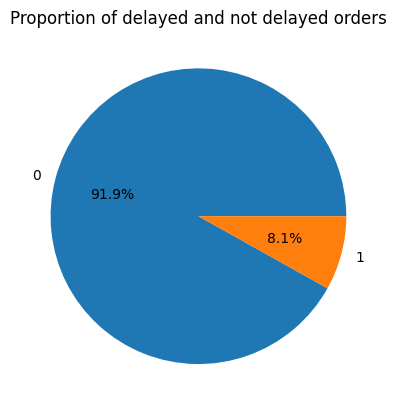

In [65]:
# plot the weight of orders that are delayed

df_aggr_delayed = df_orders_delivered.groupby("is_delayed", as_index=False)["order_id"].nunique()

fig, ax = plt.subplots()
ax.pie(df_aggr_delayed["order_id"], labels=df_aggr_delayed["is_delayed"], autopct='%1.1f%%')
ax.set_title("Proportion of delayed and not delayed orders")
plt.show()

> 8.1% of orders are delayed

# Correlation

## Customer Satisfaction vs Delayed Orders

Is there a correlation between having unsatisfied reviews and delayed orders?

In [66]:
# merge orders table and reviews table. Inner join. Might miss some orders without reviews => ok for the specific analysis
df_merged = pd.merge(df_orders_delivered,df_reviews,on="order_id",how="inner")

In [67]:
# check pk
df_merged["order_id"].nunique() == len (df_merged) #one order have multiple reviews

False

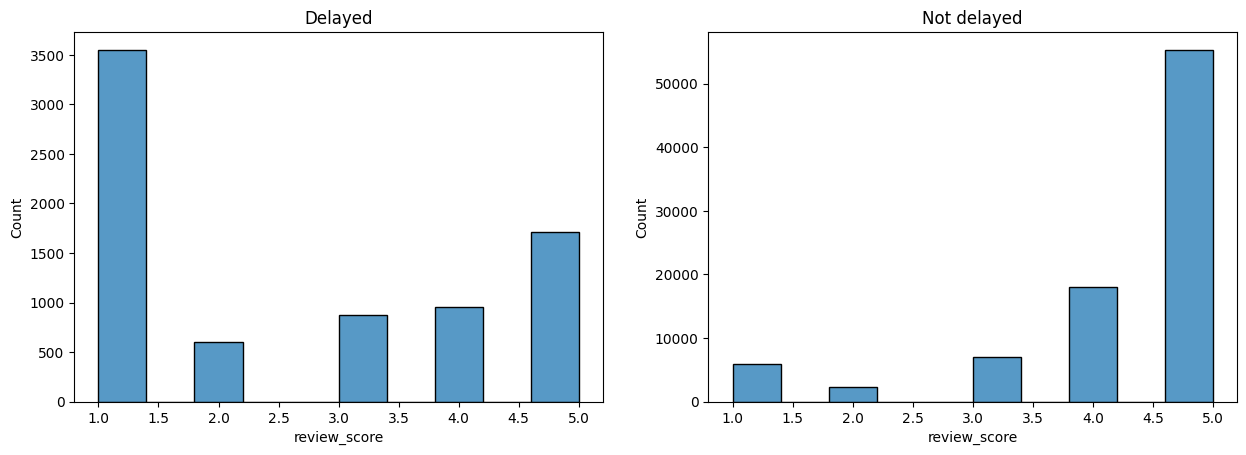

In [68]:
# show the distribution of review scores for delayed and not delayed orders
fig, (ax1,ax2) = plt.subplots(1,2)
sns.histplot(data=df_merged[df_merged["is_delayed"]==1], x="review_score", bins=10, ax=ax1)
sns.histplot(data=df_merged[df_merged["is_delayed"]==0], x="review_score", bins=10, ax=ax2)
fig.set_figwidth(15)
ax1.title.set_text("Delayed")
ax2.title.set_text("Not delayed")

* The most common review score among the delayed orders : 1
* The most common review score among the not delayed orders: 5

Hypothesis to be proved: If the order is delayed, the customer tends to be unsatisfied.

## Delayed orders vs Order Price

If the customers who pays more have less delayed orders?

In [69]:
# aggregate price by order_id
df_aggr_orders_price = df_orders_items.groupby("order_id") [['price', 'freight_value', 'total_turnover']].sum()

# merge
df_merged_delivered_price = pd.merge(df_orders_delivered, df_aggr_orders_price, on="order_id", how="inner")

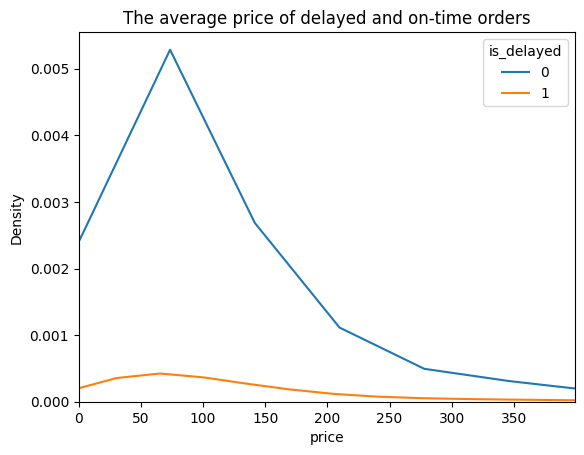

In [70]:
# plot the average price of delayed and on-time orders
fig = sns.kdeplot(data=df_merged_delivered_price, x="price", hue="is_delayed")
fig.set_xlim(0, np.percentile(df_merged_delivered_price["price"],95))
fig.set_title("The average price of delayed and on-time orders")
plt.show()

Hypothesis to be proved - There is a difference between the average price of delayed and on-time orders

# Hypothesis Testing

### Chi-squared test



*   **Question**: "Is there a **relationship** between unsatisfied reviews and delayed orders?" 5% risk
*   H0: There is no relationship

In [71]:
df_delayed_satisfied = pd.pivot_table(df_merged, values='order_id', index=["is_satisfied"],
                       columns=['is_delayed'], aggfunc="nunique")

In [72]:
df_delayed_satisfied / df_delayed_satisfied.sum()

is_delayed,0,1
is_satisfied,,
0,0.172388,0.653676
1,0.827612,0.346324


In [73]:
# Create contigency table
df = df_delayed_satisfied

# Perform Chi-Squared test
chi_res = stats.chi2_contingency(df)

print(f'p-value: {chi_res[1]}')

p-value: 0.0


We reject H0 => There is a relationship between being unsatisfied and having the delayed orders



## Z-test

*   **Question**: "Is there a **difference** in the mean price between delayed and not delayed orders?" 5% risk
*   H0: There is no difference

In [74]:
df_delayed = df_merged_delivered_price[df_merged_delivered_price ["is_delayed"] == 1]["price"]

In [75]:
df_on_time = df_merged_delivered_price[df_merged_delivered_price ["is_delayed"] == 0]["price"]

In [76]:
from statsmodels.stats.weightstats import ztest

zScore, pValue = ztest(df_delayed,
                       df_on_time)

print(f'p-value: {pValue}')

p-value: 1.0809113193391223e-06


We reject H0 => There is a difference in the average price of delayed and on-time orders

## Pearson Correlation

In [77]:
df_merged[['delivery_time_days', 'is_delayed', 'delayed_nb_days','review_score','is_satisfied']].corr()

,delivery_time_days,is_delayed,delayed_nb_days,review_score,is_satisfied
delivery_time_days,1.000000,0.587772,0.693787,-0.333606,-0.292204
is_delayed,0.587772,1.000000,0.521438,-0.364475,-0.320211
delayed_nb_days,0.693787,0.521438,1.000000,-0.263219,-0.225359
review_score,-0.333606,-0.364475,-0.263219,1.000000,0.895518
is_satisfied,-0.292204,-0.320211,-0.225359,0.895518,1.000000


There is **a negative correlaion** - Higher delivery time leads to the lower review score



# General conclusions



*   There is a relationship between being unsatisfied and delayed orders
*   There is a difference between the average price of delayed and on-time orders
* Higher delivery time leads to the lower review score







